In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import ineqpy
DATA_dir = "sugarscape/data/"

In [62]:
data_filenames = [f for f in listdir(DATA_dir) if isfile(join(DATA_dir, f))]
print(data_filenames)

['2021-01-24 23.05 Agent Vars.csv']


In [63]:
df_concat_list = []
run = 0
for data_filename in data_filenames:
    df = pd.read_csv(DATA_dir + data_filename)
    df.insert(0, "Run", run)
    run += 1
    
    for step in set(df["Step"].tolist()):
        wealth = np.array( df.loc[(df.Step == step)]["Wealth"].tolist() )
        gini = ineqpy.gini(np.array(wealth))
        df.loc[(df.Step == step), "Gini"] = gini
        
    df_concat_list.append(df)

data_raw = pd.concat(df_concat_list)
del df_concat_list
del run
data_raw

,Run,Step,AgentID,Wealth,Position,Vision,N_Agents,Size,inheritance taxbrackets,inheritance tax percentages,Starting Wealth,Gini
0,0,0,0,5.000000,"(33, 3)",5,1000,50,[],[],5,1.529948e-31
1,0,0,1,5.000000,"(33, 38)",5,1000,50,[],[],5,1.529948e-31
2,0,0,2,5.000000,"(48, 16)",5,1000,50,[],[],5,1.529948e-31
3,0,0,3,5.000000,"(37, 5)",5,1000,50,[],[],5,1.529948e-31
4,0,0,4,5.000000,"(20, 4)",5,1000,50,[],[],5,1.529948e-31
...,...,...,...,...,...,...,...,...,...,...,...,...
176050,0,199,220-4,5.003328,"(40, 8)",5,1000,50,[],[],5,1.198197e+01
176051,0,199,183-4,5.003328,"(11, 26)",5,1000,50,[],[],5,1.198197e+01
176052,0,199,741-4,5.003328,"(35, 29)",5,1000,50,[],[],5,1.198197e+01
176053,0,199,569-4,5.003328,"(49, 32)",5,1000,50,[],[],5,1.198197e+01


In [64]:
data = data_raw.groupby(["Run", "Step"]).mean().reset_index()
data = data[["Run", "Step", "Gini"]]
data

,Run,Step,Gini
0,0,0,1.529948e-31
1,0,1,6.024342e-01
2,0,2,6.293734e-01
3,0,3,6.325169e-01
4,0,4,6.352268e-01
...,...,...,...
195,0,195,1.810927e+01
196,0,196,1.938652e+01
197,0,197,2.626312e+01
198,0,198,1.951339e+01


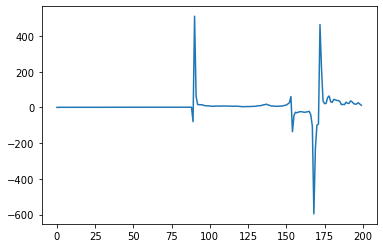

In [65]:
plt.plot(data["Gini"].tolist())
plt.show()